In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB

In [149]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [150]:
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text

In [151]:
###Read stocktwits data for Amazon. The ML model predicts the sentiments of messages in this dataset, for the period of 2019-07-21 to 2020-07-22

df1=pd.read_csv("AMZN_label.csv")
df1= df1.dropna(subset=['message']).reset_index()  

###Read financial corpus data. The ML model will train and test based on the data in this dataset
fin_corpus=pd.read_csv("tweet_sentiment.csv")

In [152]:

stocktwits_data = df1[['symbol', 'message', 'Date']]
stocktwits_data['Date'] = pd.to_datetime(stocktwits_data['Date'])

stocktwits_data = stocktwits_data[stocktwits_data['Date'] > '2020-03-15']
stocktwits_data = stocktwits_data[stocktwits_data['Date'] < '2020-04-16']

<ipython-input-152-7f0c8a3c9143>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocktwits_data['Date'] = pd.to_datetime(stocktwits_data['Date'])


In [153]:
stocktwits_data.tail(5)

,symbol,message,Date
45473,AMZN,amzn spy 737 corona cases still 5 hours go clo...,2020-03-16
45474,AMZN,tsla msft shop amzn nov markets nov 2016 expec...,2020-03-16
45475,AMZN,spy baba amzn aapl buy everything next 2 months,2020-03-16
45476,AMZN,amzn friends going,2020-03-16
45477,AMZN,spy aapl amzn msft tsla futures watch sunday n...,2020-03-16


In [154]:
fin_corpus.rename(columns={'cleaned_tweets': 'text', 'sentiment': 'sentiment'}, inplace=True)
fin_corpus.head(5)

,text,sentiment
0,video offic mind busi david solomon tell gs in...,0
1,price lumber lb f sinc hit ytd high maci turna...,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict ...,1
4,satellit avoid attack space junk circl earth paid,-1


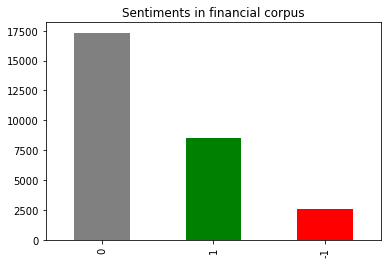

In [156]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["grey","green", "red"])
plt.title('Sentiments in financial corpus')
plt.show()

In [157]:
fin_corpus['sentiment'].value_counts()

 0    17330
 1     8512
-1     2598
Name: sentiment, dtype: int64

In [158]:
##fin_corpus.drop(fin_corpus.loc[fin_corpus['sentiment']==0].index, inplace=True)

fin_corpus["sentiment"].replace({1: "Positive"}, inplace=True)
fin_corpus["sentiment"].replace({0: "Neutral"}, inplace=True)
fin_corpus["sentiment"].replace({-1: "Negative"}, inplace=True)

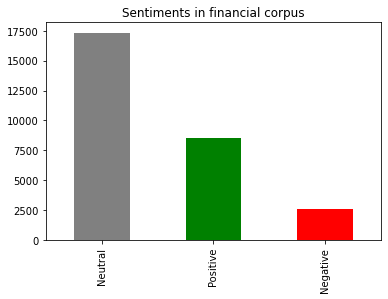

In [160]:
fin_corpus['sentiment'].value_counts().plot.bar(color = ["grey","green", "red"])
plt.title('Sentiments in financial corpus')
plt.show()

In [97]:
fin_corpus['sentiment'].value_counts()

Neutral     17330
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [98]:
train_data = fin_corpus
train_data = train_data.dropna()
train_data['sentiment'].value_counts()


Neutral     17324
Positive     8512
Negative     2598
Name: sentiment, dtype: int64

In [99]:
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [100]:
# Create a new column with the cleaned messages
train_data['text_clean'] = train_data['text'].apply(lambda string: clean_str(string))

# Display the result
train_data.head()

<ipython-input-100-afd0f154b6fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['text_clean'] = train_data['text'].apply(lambda string: clean_str(string))


,text,sentiment,text_clean
0,video offic mind busi david solomon tell gs in...,Neutral,video offic mind busi david solomon tell gs in...
1,price lumber lb f sinc hit ytd high maci turna...,Neutral,price lumber lb f sinc hit ytd high maci turna...
2,say american dream dead,Negative,say american dream dead
3,barri silbert extrem optimist bitcoin predict ...,Positive,barri silbert extrem optimist bitcoin predict ...
4,satellit avoid attack space junk circl earth paid,Negative,satellit avoid attack space junk circl earth paid


In [101]:
import nltk
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
encoder = preprocessing.LabelEncoder()
from imblearn.under_sampling import RandomUnderSampler
##encoder = preprocessing.LabelEncoder()

y = train_data.sentiment
x = train_data.text_clean


In [102]:
# TFIDF feature generation for a maximum of 5000 features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(train_data['text_clean'])
x = tfidf_vect.transform(x)
##X_test = tfidf_vect.transform(X_test)
##xtrain_tfidf.data

In [103]:
##y = train_data.sentiment
##x = train_data.text_clean

encoder.fit(y)
y = encoder.fit_transform(y)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

##X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [104]:
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=17324 (33.333%)
Class=0, n=17324 (33.333%)
Class=2, n=17324 (33.333%)


In [105]:
x

<51972x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 575603 stored elements in Compressed Sparse Row format>

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [107]:
# Naive Bayes classifier

from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler


# instantiate the model
nb = naive_bayes.MultinomialNB(alpha=0.2)

nb.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [108]:
nb_pred = nb.predict(X_test)

0.8838864838864838
***************************************
Confusion matrix


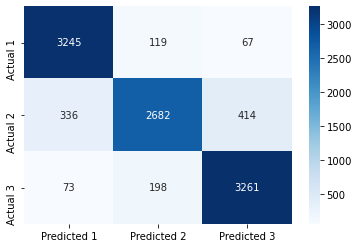

****************************************
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3431
           1       0.89      0.78      0.83      3432
           2       0.87      0.92      0.90      3532

    accuracy                           0.88     10395
   macro avg       0.88      0.88      0.88     10395
weighted avg       0.88      0.88      0.88     10395



In [109]:
print(metrics.accuracy_score(y_test,nb_pred))
print('***************************************')
print('Confusion matrix')
NB_cfm=metrics.confusion_matrix(y_test, nb_pred)


lbl1=["Predicted 1", "Predicted 2","Predicted 3"]##,'Predicted 4']
lbl2=["Actual 1", "Actual 2","Actual 3"]##,"Actual 4"]

sns.heatmap(NB_cfm, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

print('****************************************')
print(metrics.classification_report(y_test,nb_pred))